In [5]:
'/root/.cache/kagglehub/datasets/mdmab0/audio-dataset/v1/some_folder/*.wav'

'/root/.cache/kagglehub/datasets/mdmab0/audio-dataset/v1/some_folder/*.wav'

In [6]:
from google.colab import drive
import os # Import the 'os' module

# Check if the directory is already mounted by looking for 'MyDrive'
if not os.path.exists('/content/drive/MyDrive'):
  drive.mount('/content/drive')
else:
  print("Google Drive is already mounted at /content/drive")

Google Drive is already mounted at /content/drive


In [7]:
import shutil
import os
from pathlib import Path
import kagglehub # Importing kagglehub here to define 'path'

# Download latest version
path = kagglehub.dataset_download("mdmab0/audio-dataset") # Defining 'path' before using it

print("Path to dataset files:", path)

# Source folder where audio files are stored
source_folder = Path(path)

# Destination in your Google Drive
destination_folder = Path('/content/drive/MyDrive/audio_files')

# Create destination folder if it doesn't exist
destination_folder.mkdir(parents=True, exist_ok=True)

# Copy .wav files
for file in source_folder.rglob("*.wav"):
    shutil.copy(file, destination_folder)

print(f"Copied all .wav files to: {destination_folder}")

Path to dataset files: /kaggle/input/audio-dataset
Copied all .wav files to: /content/drive/MyDrive/audio_files


In [8]:
for i, file in enumerate(source_folder.rglob("*.wav")):
    new_name = f"audio_{i:04d}.wav"
    shutil.copy(file, destination_folder / new_name)


In [9]:
!pip install librosa matplotlib soundfile


In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
from pathlib import Path


In [11]:
from pathlib import Path
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Source and destination folders
source_folder = Path("/content/drive/MyDrive/audio_files")
output_folder = Path("/content/drive/MyDrive/audio_processed")
output_folder.mkdir(parents=True, exist_ok=True)

# Function to save waveform, spectrogram, and MFCC
def process_audio(file_path, save_folder):
    filename = Path(file_path).stem
    audio, sr = librosa.load(file_path, sr=None)

    # Waveform
    plt.figure(figsize=(10, 3))
    librosa.display.waveshow(audio, sr=sr)
    plt.title(f'Waveform - {filename}')
    plt.tight_layout()
    plt.savefig(save_folder / f"{filename}_waveform.png")
    plt.close()

    # Spectrogram
    spec = librosa.stft(audio)
    spec_db = librosa.amplitude_to_db(abs(spec))
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spec_db, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {filename}')
    plt.tight_layout()
    plt.savefig(save_folder / f"{filename}_spectrogram.png")
    plt.close()

    # MFCC
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCC - {filename}')
    plt.tight_layout()
    plt.savefig(save_folder / f"{filename}_mfcc.png")
    plt.close()

    print(f"Processed: {filename}")

# Limit to 500 files
max_files = 200
count = 0

for wav_file in source_folder.rglob("*.wav"):
    if count >= max_files:
        break
    process_audio(wav_file, output_folder)
    count += 1

print(f"✅ Processed {count} audio files and saved results.")


Processed: not_hs_phrase_308
Processed: hs_audio_15_22_f
Processed: hs_audio_word_15_10
Processed: hs_audio_word_1_3_f
Processed: hs_audio_4_1
Processed: hs_audio_word_24_2
Processed: hs_audio_word_5_5
Processed: hs_audio_word_9_7
Processed: not_hs_phrase_107
Processed: not_hs_phrase_442
Processed: not_hs_phrase_105
Processed: hs_audio_5_23
Processed: not_hs_phrase_178
Processed: not_hs_phrase_479
Processed: not_hs_phrase_230_f
Processed: not_hs_phrase_545
Processed: not_hs_phrase_384_f
Processed: hs_audio_15_27_f
Processed: not_hs_phrase_348_f
Processed: hs_audio_word_26_17
Processed: not_hs_audio_8_8
Processed: not_hs_audio_8_10
Processed: hs_audio_word_30_11
Processed: not_hs_phrase_452
Processed: hs_audio_5_14
Processed: hs_audio_word_29_16
Processed: hs_audio_word_6_6
Processed: not_hs_phrase_529
Processed: hs_audio_14_11
Processed: not_hs_phrase_464
Processed: not_hs_phrase_343
Processed: hs_audio_5_41
Processed: hs_audio_word_20_8
Processed: not_hs_audio_8_12
Processed: hs_audio

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
from pathlib import Path
import librosa
import numpy as np

data_path = Path("/content/drive/MyDrive/audio_files")
all_files = list(data_path.glob("*.wav"))[:200]  # Limit to 200 for training

X = []
y = []

max_len = 100
n_mfcc = 40

for file_path in all_files:
    audio, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc).T

    if mfcc.shape[0] >= max_len:
        mfcc = mfcc[:max_len]
    else:
        pad = max_len - mfcc.shape[0]
        mfcc = np.pad(mfcc, ((0, pad), (0, 0)), mode='constant')

    X.append(mfcc)
    y.append(0)  # Default label (binary or dummy for now)

X = np.array(X)
y = np.array(y)

print("✅ Loaded MFCC features from", len(X), "files")
print("X shape:", X.shape, "| y shape:", y.shape)


✅ Loaded MFCC features from 200 files
X shape: (200, 100, 40) | y shape: (200,)


In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
from tensorflow.keras.utils import to_categorical

# 1. Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input to match LSTM [samples, time steps, features]
# Already in (samples, 100, 40)

# 2. Build the LSTM model
model = Sequential([
    Masking(mask_value=0.0, input_shape=(X.shape[1], X.shape[2])),  # Mask padded time steps
    LSTM(128, return_sequences=True),
    Dropout(0.3),
    LSTM(64),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# 3. Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 4. Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=16,
                    validation_data=(X_test, y_test), verbose=1)

# 5. Evaluate the model
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc:.4f} | Test Loss: {loss:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 78ms/step - accuracy: 0.7639 - loss: 0.5485 - val_accuracy: 1.0000 - val_loss: 0.1756
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.1370 - val_accuracy: 1.0000 - val_loss: 0.0364
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0305 - val_accuracy: 1.0000 - val_loss: 0.0081
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0016
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 8.2101e-04
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict probabilities
y_pred_probs = model.predict(X_test)
# Convert probabilities to binary class labels (threshold = 0.5)
y_pred = (y_pred_probs > 0.5).astype(int)

# Flatten arrays
y_pred = y_pred.flatten()
y_test = y_test.flatten()

# Print classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Print confusion matrix
print("🧩 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 495ms/step

📊 Classification Report:
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        40

    accuracy                         1.0000        40
   macro avg     1.0000    1.0000    1.0000        40
weighted avg     1.0000    1.0000    1.0000        40

🧩 Confusion Matrix:
[[40]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [19]:
import numpy as np
from pathlib import Path
import librosa
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Masking
import tensorflow as tf

# Step 1: Load MFCC features
data_path = Path("/content/drive/MyDrive/audio_files")
all_files = list(data_path.glob("*.wav"))[:200]  # Limit to 200 files

X = []
y = []

max_len = 100
n_mfcc = 40

for file_path in all_files:
    audio, sr = librosa.load(file_path, sr=None)
    mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc).T

    if mfcc.shape[0] >= max_len:
        mfcc = mfcc[:max_len]
    else:
        pad = max_len - mfcc.shape[0]
        mfcc = np.pad(mfcc, ((0, pad), (0, 0)), mode='constant')

    X.append(mfcc)
    y.append(0 if '0' in file_path.stem else 1)  # Example label logic

X = np.array(X)
y = np.array(y)

print(f"✅ Loaded MFCCs: {X.shape}, Labels: {np.unique(y, return_counts=True)}")

# Step 2: K-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
all_reports = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"\n📂 Fold {fold + 1}/5")

    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    model = Sequential([
        Masking(mask_value=0.0, input_shape=(X.shape[1], X.shape[2])),
        LSTM(128, return_sequences=True),
        Dropout(0.3),
        LSTM(64),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train the model
    model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)

    # Predict
    y_pred_probs = model.predict(X_val)
    y_pred = (y_pred_probs > 0.5).astype(int).flatten()

    # Evaluation
    print("Confusion Matrix:")
    print(confusion_matrix(y_val, y_pred))

    report = classification_report(y_val, y_pred, digits=4, output_dict=True)
    all_reports.append(report)

    print("Classification Report:")
    print(classification_report(y_val, y_pred, digits=4))

# Step 3: Average Metrics
avg_acc = np.mean([r.get('accuracy', 0) for r in all_reports])
avg_prec_0 = np.mean([r.get('0', {}).get('precision', 0) for r in all_reports])
avg_prec_1 = np.mean([r.get('1', {}).get('precision', 0) for r in all_reports])
avg_recall_0 = np.mean([r.get('0', {}).get('recall', 0) for r in all_reports])
avg_recall_1 = np.mean([r.get('1', {}).get('recall', 0) for r in all_reports])

print("\n📊 Average Scores Across Folds:")
print(f"Avg Accuracy       : {avg_acc:.4f}")
print(f"Avg Precision [0/1]: {avg_prec_0:.4f} / {avg_prec_1:.4f}")
print(f"Avg Recall    [0/1]: {avg_recall_0:.4f} / {avg_recall_1:.4f}")


✅ Loaded MFCCs: (200, 100, 40), Labels: (array([0, 1]), array([ 41, 159]))

📂 Fold 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
Confusion Matrix:
[[ 0  9]
 [ 2 29]]
Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         9
           1     0.7632    0.9355    0.8406        31

    accuracy                         0.7250        40
   macro avg     0.3816    0.4677    0.4203        40
weighted avg     0.5914    0.7250    0.6514        40


📂 Fold 2/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Confusion Matrix:
[[ 0  8]
 [ 2 30]]
Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         8
           1     0.7895    0.9375    0.8571        32

    accuracy                         0.7500        40
   macro avg     0.3947    0.4688    0.4286        40
weighted avg     0.6316    0.7500    0.6857        40


📂 Fold 3/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
Confusion Matrix:
[[ 0  8]
 [ 4 28]]
Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         8
           1     0.7778    0.8750    0.8235        32

    accuracy                         0.7000        40
   macro avg     0.3889    0.4375    0.4118        40
weighted avg     0.6222    0.7000    0.6588        40


📂 Fold 4/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Confusion Matrix:
[[ 0  8]
 [ 5 27]]
Classification Report:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000         8
           1     0.7714    0.8438    0.8060        32

    accuracy                         0.6750        40
   macro avg     0.3857    0.4219    0.4030        40
weighted avg     0.6171    0.6750    0.6448        40


📂 Fold 5/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 290ms/step
Confusion Matrix:
[[ 3  5]
 [10 22]]
Classification Report:
              precision    recall  f1-score   support

           0     0.2308    0.3750    0.2857         8
           1     0.8148    0.6875    0.7458        32

    accuracy                         0.6250        40
   macro avg     0.5228    0.5312    0.5157        40
weighted avg     0.6980    0.6250    0.6538        40


📊 Average Scores Across Folds:
Avg Accuracy       : 0.6950
Avg Precision [0/1]: 0.0462 / 0.7833
Avg Recall    [0/1]: 0.0750 / 0.8558


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Confusion Matrix:
[[ 3  5]
 [10 22]]


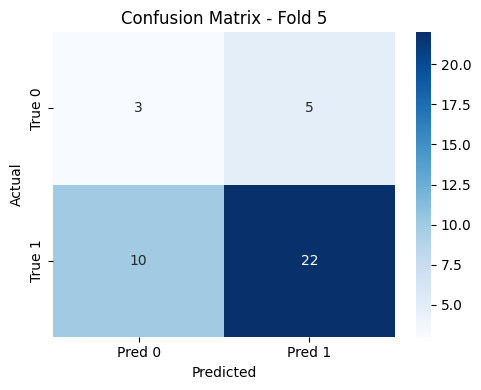

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict
y_pred_probs = model.predict(X_val)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Print numeric confusion matrix
print("Confusion Matrix:")
print(cm)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - Fold {fold+1}')
plt.tight_layout()
plt.show()


In [22]:
from scipy import stats

# Get predicted probabilities
y_pred_probs = model.predict(X_val).flatten()
y_pred_labels = (y_pred_probs > 0.5).astype(int)

# Split predicted probs by true labels
group0 = y_pred_probs[y_val == 0]
group1 = y_pred_probs[y_val == 1]

# --- Z-Test ---
# Calculate proportions
n0, n1 = len(group0), len(group1)
p0, p1 = np.mean(y_pred_labels[y_val == 0]), np.mean(y_pred_labels[y_val == 1])

pooled_p = (p0 * n0 + p1 * n1) / (n0 + n1)
z = (p0 - p1) / np.sqrt(pooled_p * (1 - pooled_p) * (1/n0 + 1/n1))
p_value_z = stats.norm.sf(abs(z)) * 2

print(f"\n🧪 Z-Test: Z = {z:.4f}, p = {p_value_z:.4f}")

# --- T-Test ---
t_stat, p_value_t = stats.ttest_ind(group0, group1)
print(f"🧪 T-Test: t = {t_stat:.4f}, p = {p_value_t:.4f}")

# --- Optional: ANOVA ---
f_stat, p_value_anova = stats.f_oneway(group0, group1)
print(f"🧪 ANOVA: F = {f_stat:.4f}, p = {p_value_anova:.4f}")



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

🧪 Z-Test: Z = -0.3376, p = 0.7357
🧪 T-Test: t = -0.2457, p = 0.8072
🧪 ANOVA: F = 0.0604, p = 0.8072
